In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot
import prince
from sklearn.feature_selection import SelectKBest, chi2 


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [50]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_members,weekend_or_weekday
0,1,0,342,2015,6,27,1,0,6,3,...,2,3,0,0,2,0.0,0,0,2,3
1,1,0,737,2015,6,27,1,0,6,3,...,2,4,0,0,2,0.0,0,0,2,3
2,1,0,7,2015,6,27,1,0,3,3,...,2,0,0,0,2,75.0,0,0,1,1
3,1,0,13,2015,6,27,1,0,3,2,...,0,0,0,0,2,75.0,0,0,1,1
4,1,0,14,2015,6,27,1,0,3,6,...,0,0,0,0,2,98.0,0,1,2,1


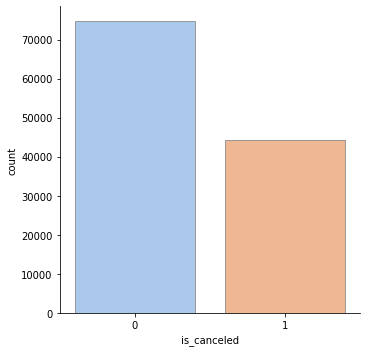

In [85]:
sns.catplot(x="is_canceled", kind="count",palette="pastel", edgecolor=".6",data=df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The dataset have 32 variables (Continuous and Categorical) with one identified dependent variable (categorical), which is 'is_cancelled.

In [5]:
#check for null values
df.apply(lambda x: sum(x.isnull()))

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.drop(['agent','company'],axis=1,inplace = True)

In [7]:
df.is_repeated_guest.unique() 

array([0, 1])

In [8]:
df.previous_cancellations.unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [9]:
df.previous_bookings_not_canceled.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [10]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [11]:
df = df.dropna(axis = 0)

In [12]:
df.country.value_counts()

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BFA        1
MDG        1
SDN        1
NPL        1
LCA        1
Name: country, Length: 177, dtype: int64

In [13]:
#Adding the number of adults children and babies into one column to get total members
df['total_members'] = df['adults']+df['children']+df['babies']
df['total_members'] = df['total_members'].astype(int) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Count')

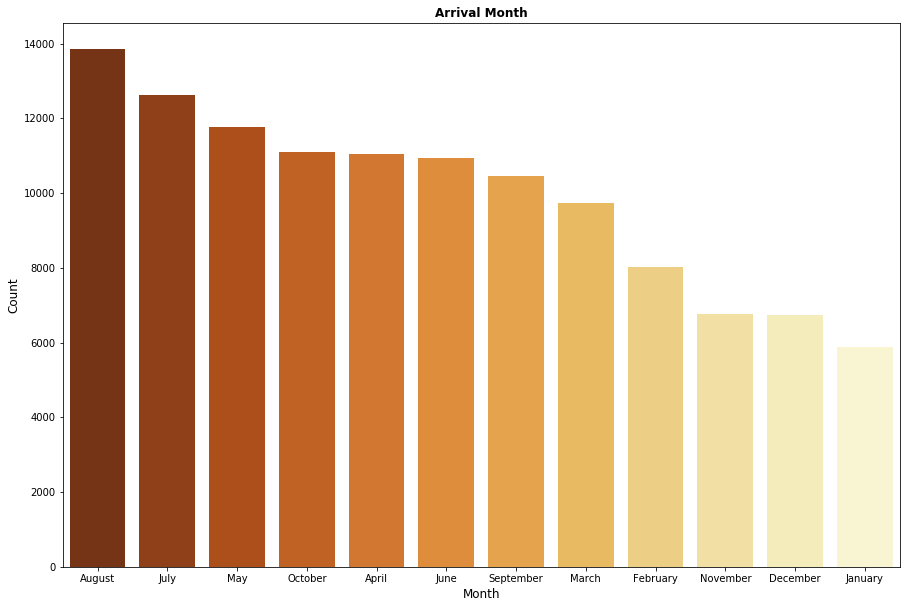

In [14]:
#`arrival_date_month` exploration 

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = df,
              order=pd.value_counts(df['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

The above graph is showing the number of bookings for each month. According to that, August is the busiest month and January is the most unoccupied month. It is half as busy as August.



In [15]:
r_h = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
c_h = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [16]:
r_h.hotel.value_counts()


Resort Hotel    28519
Name: hotel, dtype: int64

In [17]:
c_h.hotel.value_counts()

City Hotel    46226
Name: hotel, dtype: int64

In [18]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def country_per(row):  
    '''Keep top 10 values and set the rest to 'other'''

    if row['country']=='PRT':
        return 'PRT'
    elif row['country']=='GBR':
        return 'GBR'
    elif row['country']=='FRA':
        return 'FRA'
    elif row['country']=='ESP':
        return 'ESP'
    elif row['country']=='DEU':
        return 'DEU' 
    elif row['country']=='ITA':
        return 'ITA'
    else:
        return 'Others'
    
df['country'] = df.apply(lambda row: country_per(row), axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
df['country'].value_counts()

PRT       48586
Others    28147
GBR       12129
FRA       10415
ESP        8568
DEU        7287
ITA        3766
Name: country, dtype: int64

In [20]:
counts = df['country'].value_counts()

In [21]:
total = counts/counts.sum()

In [22]:
total

PRT       0.408636
Others    0.236732
GBR       0.102012
FRA       0.087596
ESP       0.072062
DEU       0.061288
ITA       0.031674
Name: country, dtype: float64

Text(0.5, 1.0, '')

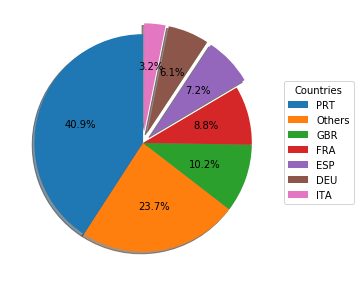

In [23]:
country_names = [x for x in total.index]
percentage_values = [x for x in total]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
#Pie Chart

#separate one slice by 0.2 points
explode = (0, 0, 0, 0, 0.1, 0.1,0.1) 

axes.pie(percentage_values, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)

#make a legend
axes.legend(country_names, # wedges' titles 
               title="Countries",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title('')

In [24]:
# Counting adults and children as paying guests only, not babies.
r_h["adr_pp"] = r_h["adr"] / r_h["total_members"] 
c_h["adr_pp"] = c_h["adr"] / c_h["total_members"] 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


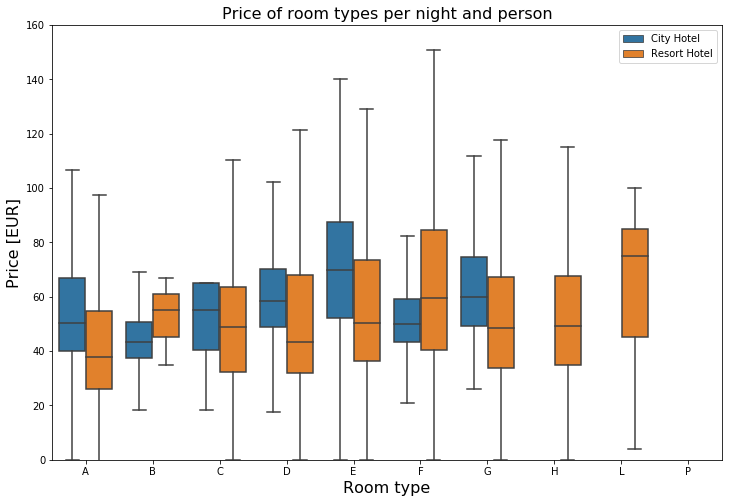

In [25]:
# normalize price per night (adr):
df["adr_pp"] = df["adr"] / (df["total_members"])
full_data_guests = df.loc[df["is_canceled"]] # only actual gusts
room_prices = df[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()


In [26]:
df["adr_pp"] = df["adr_pp"].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
# Create a DateFrame with the relevant data:
r_h["total_nights"] = r_h["stays_in_weekend_nights"] + r_h["stays_in_week_nights"]
c_h["total_nights"] = c_h["stays_in_weekend_nights"] + c_h["stays_in_week_nights"]

num_nights_res = list(r_h["total_nights"].value_counts().index)
num_bookings_res = list(r_h["total_nights"].value_counts())
rel_bookings_res = r_h["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(c_h["total_nights"].value_counts().index)
num_bookings_cty = list(c_h["total_nights"].value_counts())
rel_bookings_cty = c_h["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


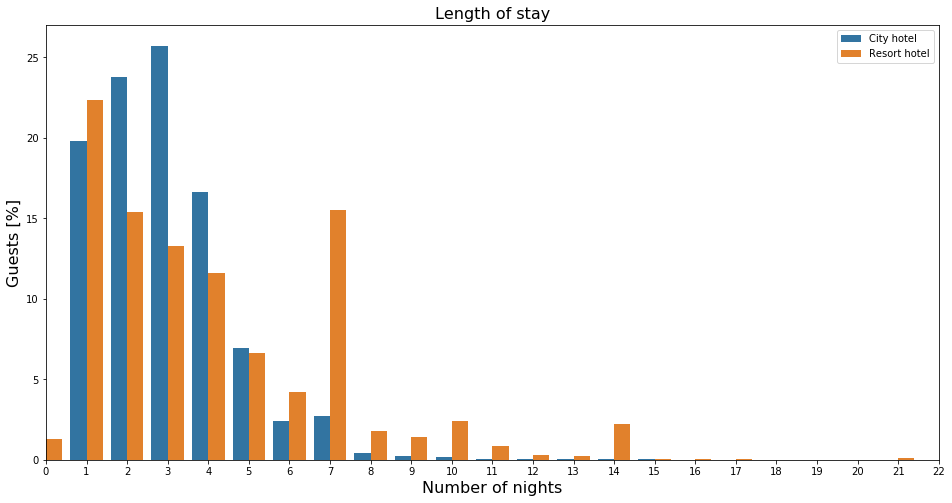

In [28]:
#show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

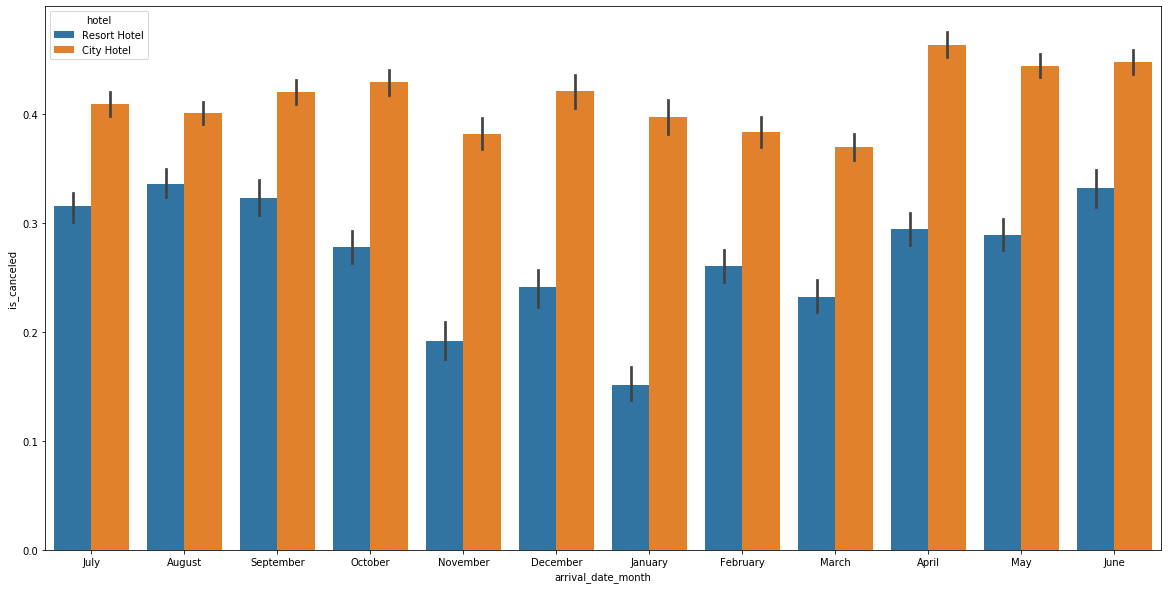

In [29]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = df);

Looking at the first graph, it can be seen that the city hotels have more customers in all months. Considering proportionally, resort hotels seem to be a little closer to city hotels in summer.

An important interpretation can be made by examining three graphics together. Fewer customers come in the winter months, so when we look at the cancellation rates, it is quite normal that it appears less in the winter months. The point to be noted on these months is that the cancellation rates of city hotels are almost equal to other months even in winter. The fact that the total cancellation rates of the winter months are low is that the cancellation rates of the resort hotels are low in these months. In short, the possibility of cancellation of resort hotels in winter is very low. This information can be a very important factor when predicting 'is_canceled'.

Next graph is about weekend_or_weekday feature's relationship with arrival_date_month. Below bar graph shows that most bookings were made to stay only for weekdays or both weekdays and weekends. On the other, numbers of staying just the weekend category are quite low compared to other categories.

In [30]:
df['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
week_function(df['stays_in_weekend_nights'],df['stays_in_week_nights'], df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Count')

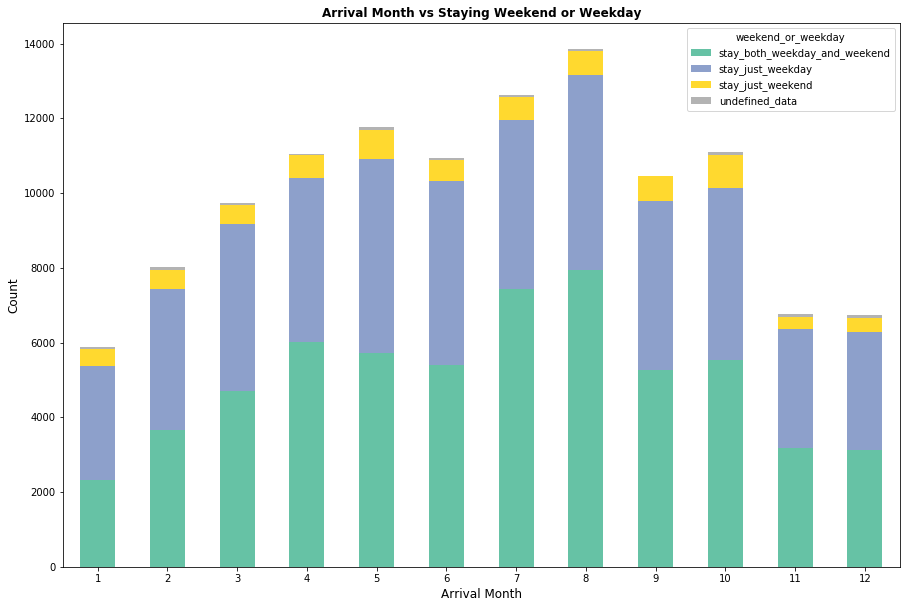

In [32]:
#`arrival_date_month` vs `weekend_or_weekday` graph 

df['arrival_date_month']= df['arrival_date_month'].astype('int64')
group_data = df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

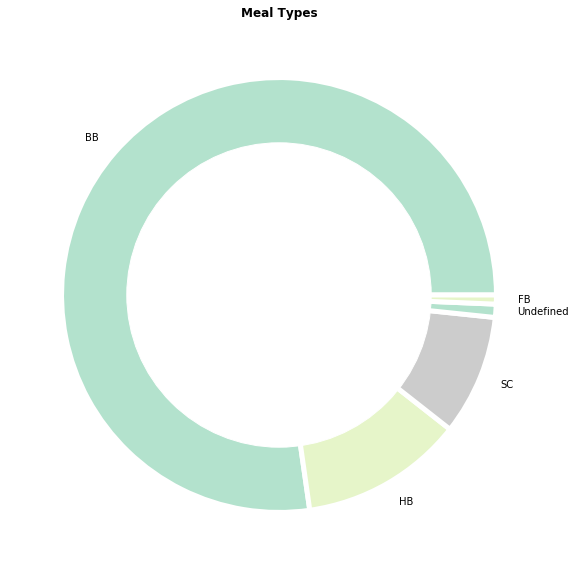

In [33]:
# `Meal` feature donut chart

meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = df['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

In [34]:

group_meal_data = df.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.68,0.06,0.44,0.99,0.00
Resort Hotel,0.32,0.94,0.56,0.01,1.00


Text(0, 0.5, 'Lead Time')

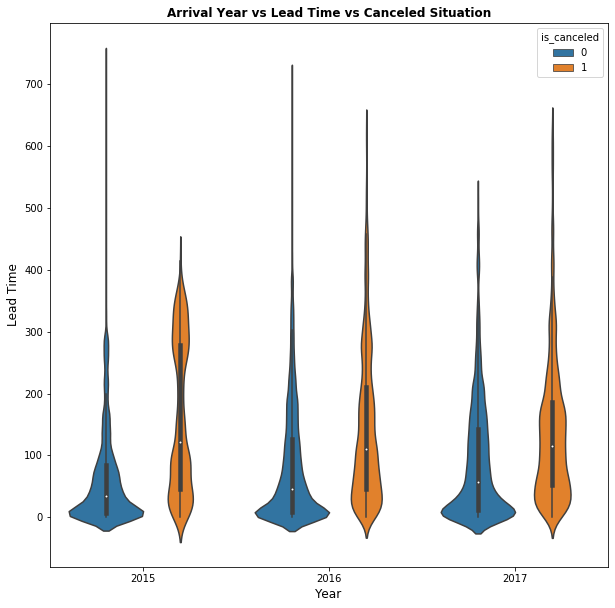

In [35]:
plt.figure(figsize=(10,10))


ax = sns.violinplot(x="arrival_date_year", y="lead_time", hue="is_canceled", data=df)
ax.set_title('Distribution of total bill amount per day', fontsize=16);


plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

In [36]:
df.drop(['adults','children','babies','stays_in_weekend_nights', 'stays_in_week_nights'],axis=1,inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  int64  
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   meal                            118898 non-null  object 
 8   country                         118898 non-null  object 
 9   market_segment                  118898 non-null  object 
 10  distribution_channel            118898 non-null  object 
 11  is_repeated_guest               118898 non-null  int64  
 12  previous_cancell

In [38]:
num_df = df.select_dtypes(include='number')

In [39]:
num_df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_members', 'adr_pp'],
      dtype='object')

Text(0.5, 1, 'Correlation Matrix Pearson Method- Numerical Data ')

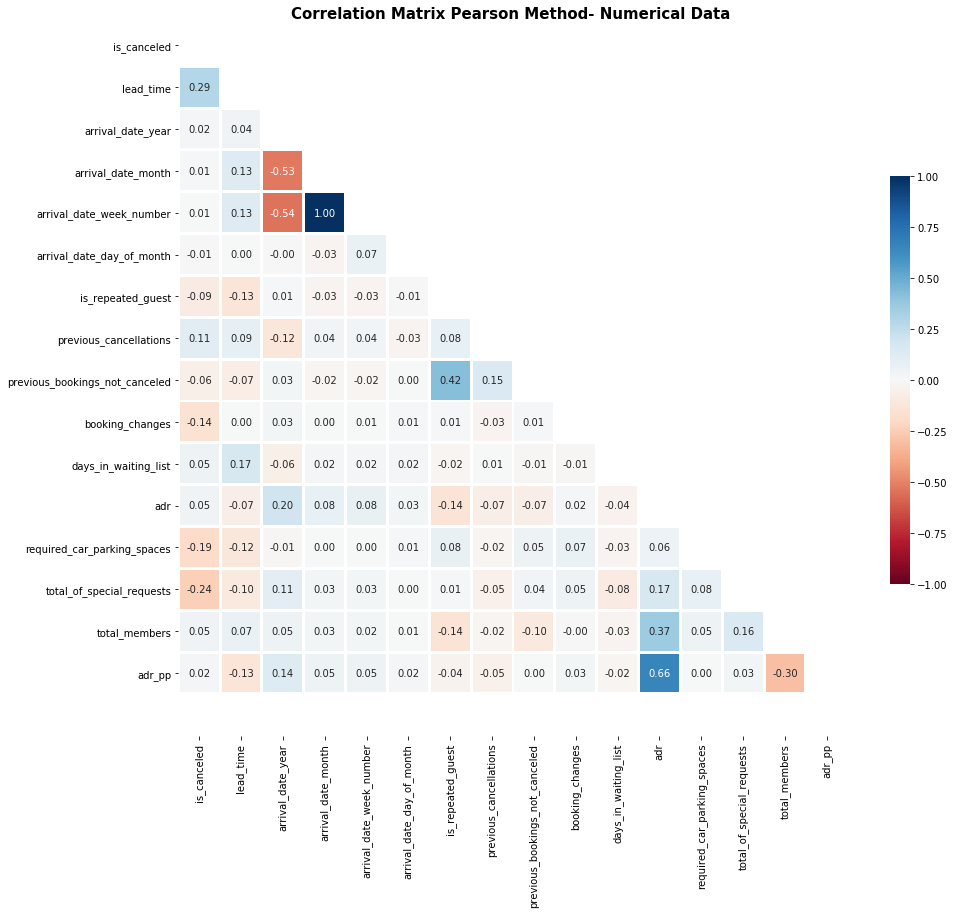

In [40]:
plt.figure(figsize=(15,15))
corr_numerical=num_df.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

In [41]:
df['is_canceled_vals'] = df['is_canceled'].map({0:'n_canceled', 1:'canceled'}) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
labelencoder = LabelEncoder()
df['hotel'] = labelencoder.fit_transform(df['hotel'])
df['arrival_date_month'] = labelencoder.fit_transform(df['arrival_date_month'])
df['meal'] = labelencoder.fit_transform(df['meal'])
df['country'] = labelencoder.fit_transform(df['country'])
df['market_segment']= labelencoder.fit_transform(df['market_segment'])
df['distribution_channel']=labelencoder.fit_transform(df['distribution_channel'])
df['is_repeated_guest'] = labelencoder.fit_transform(df['is_repeated_guest'])
df['reserved_room_type'] = labelencoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = labelencoder.fit_transform(df['assigned_room_type'])
df['deposit_type'] = labelencoder.fit_transform(df['deposit_type'])
#df['agent'] = labelencoder.fit_transform(df['agent'])
df['customer_type'] = labelencoder.fit_transform(df['customer_type'])
df['reservation_status'] = labelencoder.fit_transform(df['reservation_status'])
df['weekend_or_weekday'] = labelencoder.fit_transform(df['weekend_or_weekday'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [43]:
#Create new dataframe for categorical data

cat_df = df[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type',
                                     'customer_type','reservation_status','weekend_or_weekday']] 
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 118898 non-null  int64
 1   is_canceled           118898 non-null  int64
 2   arrival_date_month    118898 non-null  int64
 3   meal                  118898 non-null  int64
 4   country               118898 non-null  int64
 5   market_segment        118898 non-null  int64
 6   distribution_channel  118898 non-null  int64
 7   is_repeated_guest     118898 non-null  int64
 8   reserved_room_type    118898 non-null  int64
 9   assigned_room_type    118898 non-null  int64
 10  deposit_type          118898 non-null  int64
 11  customer_type         118898 non-null  int64
 12  reservation_status    118898 non-null  int64
 13  weekend_or_weekday    118898 non-null  int64
dtypes: int64(14)
memory usage: 18.6 MB


Text(0.5, 1, 'Correlation Matrix Spearman Method- Categorical Data ')

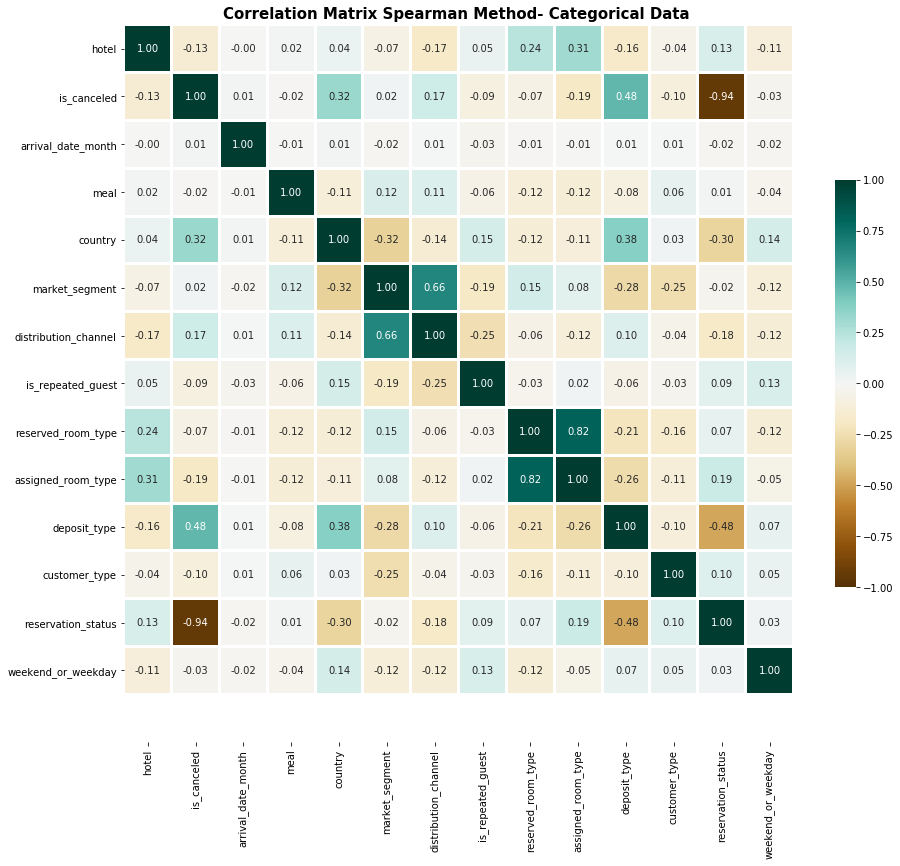

In [44]:
plt.figure(figsize=(15,15))
corr_categorical=cat_df.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

In [45]:
df.drop('adr_pp',inplace = True, axis = 1)

In [46]:
df.drop(['reservation_status_date','reservation_status'],inplace = True, axis = 1)

In [47]:
df.drop('is_canceled_vals',inplace = True, axis = 1)


In [ ]:
def conf_mat(metrics):
    '''plot and display the confusion matrix'''
    array = metrics['confusion_matrix']
    classes=['cancelled','n-cancelled']
    df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,cmap="Blues")
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score

def calculate_metrics(y_test, y_pred, y_prob=None, sample_weights=None):
    """Cacluate model performance metrics"""

    # Dictionary of metrics to calculate
    metrics = {}
    metrics['confusion_matrix']  = confusion_matrix(y_test, y_pred, sample_weight=sample_weights)
    metrics['accuracy']          = accuracy_score(y_test, y_pred, sample_weight=sample_weights)
    metrics['precision']         = precision_score(y_test, y_pred, sample_weight=sample_weights,average='weighted')
    metrics['recall']            = recall_score(y_test, y_pred, sample_weight=sample_weights,average='weighted')


    return metrics

In [61]:
data_train, data_test = train_test_split(df, test_size=0.25,random_state=1443,stratify=df.is_canceled)

In [62]:
data_train.shape

(89173, 25)

In [63]:
data_test.shape

(29725, 25)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pan

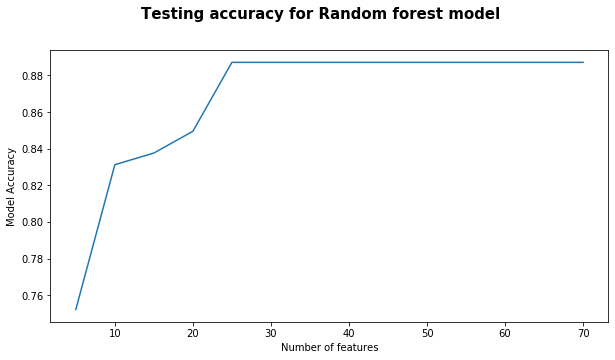

In [61]:
model = RandomForestClassifier(n_estimators=200,max_depth=50, random_state=14400)
test_error = []
feature_num = [5,10,15,20,25,30,35,40,45,50,55,60,65,70]
data_train, data_test = train_test_split(df, test_size=0.25,random_state=1443,stratify=df.is_canceled)
X_train1 = data_train
y_train = data_train['is_canceled']
X_test1 = data_test
y_test = data_test['is_canceled']

for i in feature_num:
    feature_list = [k for k in X_train1.columns][0:i]
    
 
        

        
    # selecting best catagories
    X_train = X_train1[feature_list]
    X_train.drop('is_canceled',inplace=True,axis=1)
    X_train = pd.get_dummies(X_train)
    

    
    X_test = X_test1[feature_list]
    X_test.drop('is_canceled',inplace=True,axis=1)
    X_test = pd.get_dummies(X_test)
    
    
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    test_error.append(metrics.accuracy_score(y_test, y_pred))
    
    
fig = plt.figure()
ax = plt.subplot()
ax.plot(feature_num,test_error)

ax.set_xlabel('Number of features')
ax.set_ylabel('Model Accuracy')
#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(10,5)   
#Set a title for the figure
fig.suptitle('Testing accuracy for Random forest model'\
             ,y=1,fontsize=15,fontweight='bold')
plt.show()
    
    




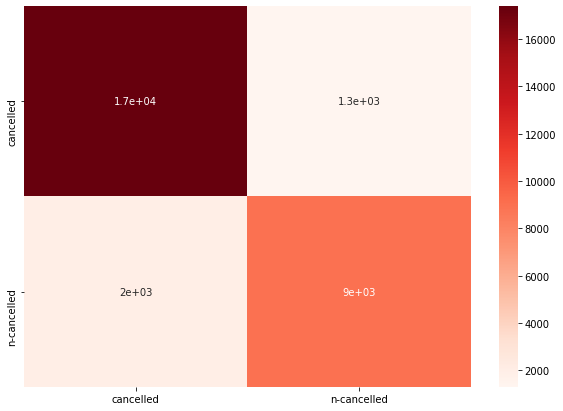

In [76]:
metrics = calculate_metrics(y_test, y_pred)
conf_mat(metrics)

In [73]:
pd.DataFrame.from_dict(metrics, orient='index')


,0
confusion_matrix,"[[17381, 1306], [2048, 8990]]"
accuracy,0.887166
precision,0.886631
recall,0.887166


In [77]:
best_20 = [k for k in X_train1.columns][0:28]
best_20

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_members',
 'weekend_or_weekday']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
# selecting best catagories
X_train = X_train1[best_20]
X_train.drop('is_canceled',inplace=True,axis=1)
X_train = pd.get_dummies(X_train)
X_test = X_test1[best_20]
X_test.drop('is_canceled',inplace=True,axis=1)
X_test = pd.get_dummies(X_test)

In [92]:
def model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075, 0.7],
                      'max_depth': [13, 14],
                      'min_samples_leaf': [15, 16],
                      'max_features': [1.0],
                      'n_estimators': [100, 200]}                      

        estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        y_pred = estimator.predict(X_test)
        metrics1 = calculate_metrics(y_test, y_pred)
        conf_mat(metrics1) 
        return metrics1

{'learning_rate': 0.075, 'max_depth': 14, 'max_features': 1.0, 'min_samples_leaf': 15, 'n_estimators': 200}


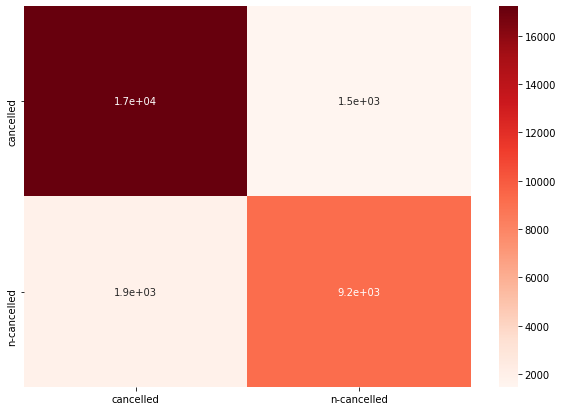

In [93]:
grad=model(X_train, X_test, y_train, y_test)

In [96]:
pd.DataFrame.from_dict(grad, orient='index')

,0
confusion_matrix,"[[17220, 1467], [1867, 9171]]"
accuracy,0.887839
precision,0.887299
recall,0.887839
